# 1: Introduction

 dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).

Major_code - Major code.

Major - Major description.

Major_category - Category of major.

Total - Total number of people with major.

Sample_size - Sample size (unweighted) of full-time.

Men - Male graduates.

Women - Female graduates.

ShareWomen - Women as share of total.

Employed - Number employed.

Median - Median salary of full-time, year-round workers.

Low_wage_jobs - Number in low-wage service jobs.

Full_time - Number employed 35 hours or more.

Part_time - Number employed less than 36 hours.

Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
Using scatter plots
How many majors are predominantly male? Predominantly female?
Using histograms
Which category of majors have the most students?
Using bar plots
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

# 2: Pandas and scatterplots

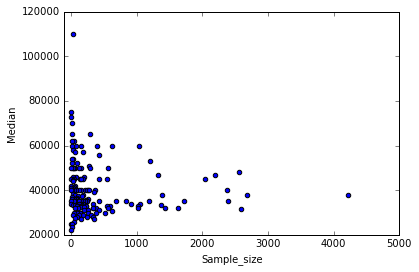

In [8]:
recent_grads.plot(x='Sample_size',
                  y='Median',
                  kind='scatter',
                 xlim=(-100,5000),
                 ylim=(20000,120000))

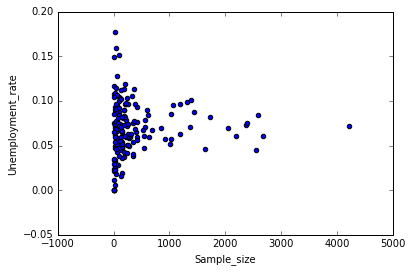

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

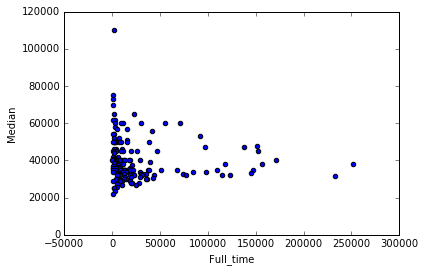

In [10]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

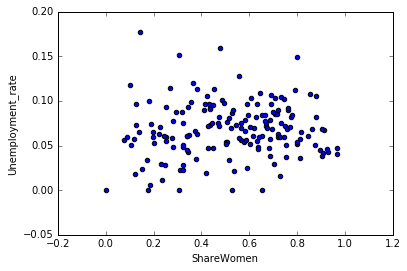

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

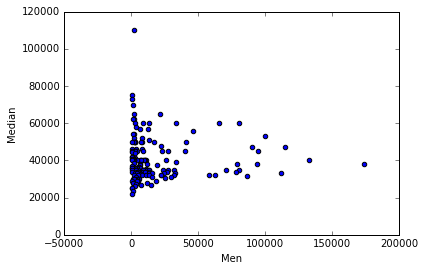

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

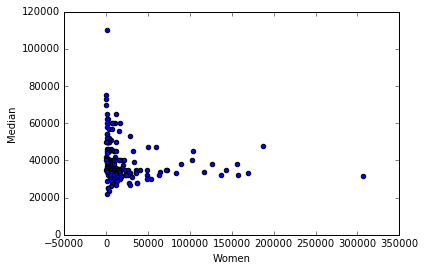

In [24]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

# 3: Pandas, Histograms

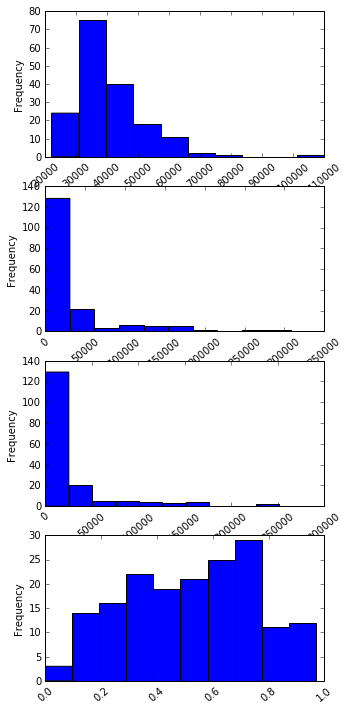

In [25]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

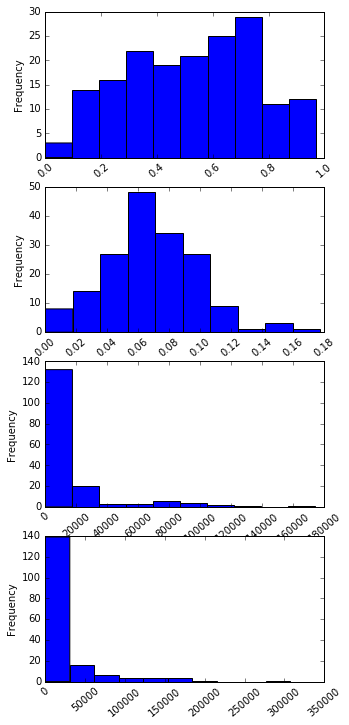

In [26]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

# 4: Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6e31128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6f2bd68>]], dtype=object)

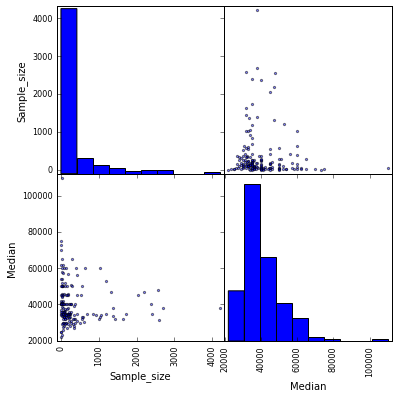

In [28]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6ce6fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6a42fd0>]], dtype=object)

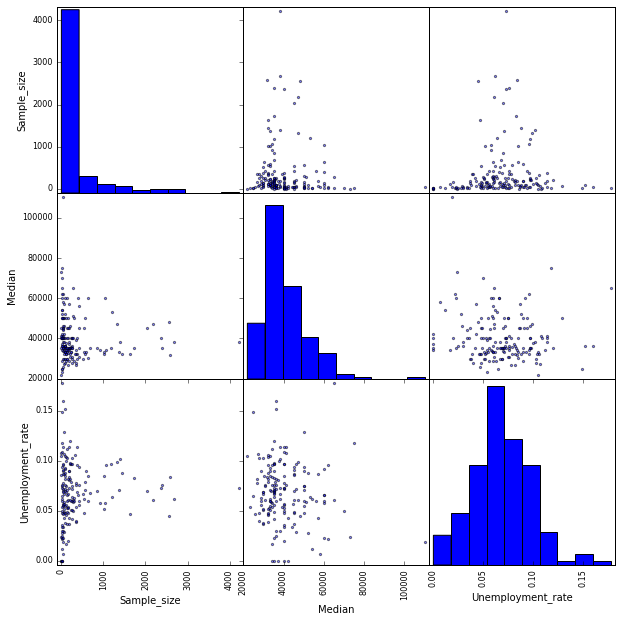

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# 5: Pandas, Bar Plots

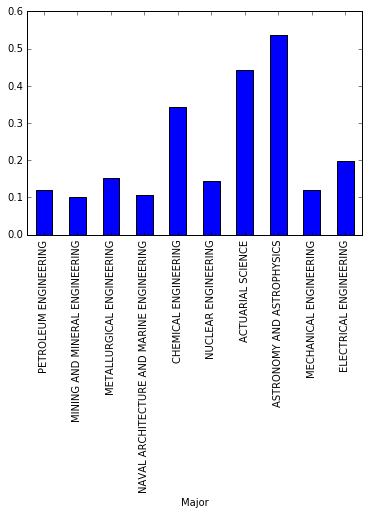

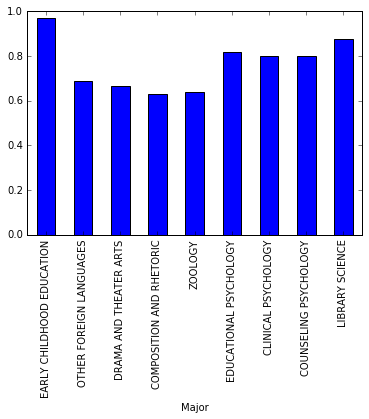

In [36]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

In [37]:
recent_grads["Men"]

0       2057.0
1        679.0
2        725.0
3       1123.0
4      21239.0
5       2200.0
6       2110.0
7        832.0
8      80320.0
9      65511.0
10     33258.0
11     12953.0
12      8407.0
13      2949.0
14      3526.0
15      6062.0
16     12453.0
17     45683.0
18      1835.0
19       877.0
20     99743.0
22      8181.0
23      2020.0
24     13496.0
25     41081.0
26     16820.0
27      7921.0
28      7398.0
29      2639.0
30      2662.0
        ...   
143     4897.0
144     2049.0
145    86648.0
146    29909.0
147    15670.0
148     3240.0
149    24786.0
150     5166.0
151     5137.0
152     5347.0
153     4133.0
154     2734.0
155     1936.0
156      885.0
157     2013.0
158    18616.0
159     4754.0
160     4364.0
161      404.0
162    11376.0
163     1225.0
164     1167.0
165     3472.0
166    14440.0
167     7022.0
168     3050.0
169      522.0
170      568.0
171      931.0
172      134.0
Name: Men, dtype: float64

# TO DO
Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

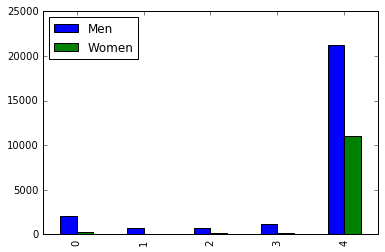

In [57]:
# plot
pd.concat(
    [recent_grads["Men"][:5],
     recent_grads["Women"][:5]],
axis=1
).plot.bar()

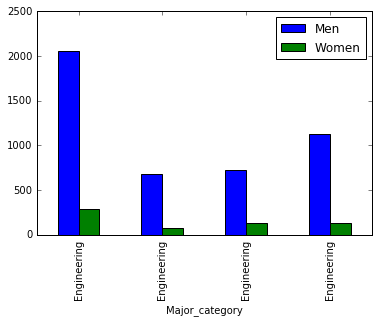

In [66]:
recent_grads[:4].plot.bar(
    x="Major_category",
    y=["Men", "Women"]
    )


# TO DO
Use a box plot to explore the distributions of median salaries and unemployment rate.

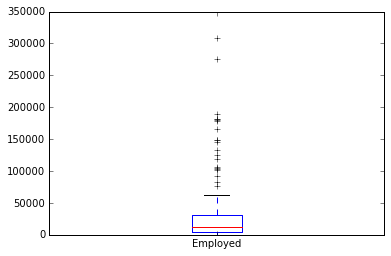

In [75]:
recent_grads.plot(
    kind = "box",
    x="Median",
    y="Employed",
legend=True)

# TO DO
Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project

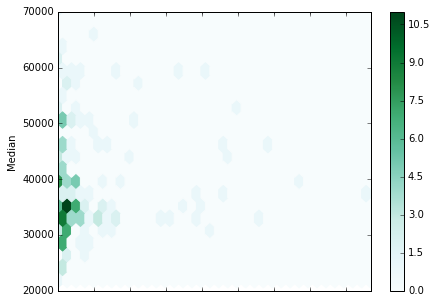

In [111]:
df = recent_grads[["Men", "Median"]]

df.plot(
    kind = "hexbin",
    x="Men",
    y="Median",
    figsize=(7,5),
    ylim=(20000, 70000),
    gridsize=35,
legend=True)